<a href="https://colab.research.google.com/github/RubingLi123/foster_2023spring/blob/2023sp-master/Homeworks/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
#If opening in colab run this cell
!git clone https://github.com/CTVisMe/DS4B_Sp24
%cd DS4B_Sp24/Homeworks/

Cloning into 'DS4B_Sp24'...
remote: Enumerating objects: 725, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 725 (delta 55), reused 126 (delta 55), pack-reused 598
Receiving objects: 100% (725/725), 132.06 MiB | 26.26 MiB/s, done.
Resolving deltas: 100% (318/318), done.
Updating files: 100% (126/126), done.
/content/DS4B_Sp24/Homeworks/DS4B_Sp24/Homeworks


# REMEMBER TO SAVE THIS NOTEBOOK TO YOUR OWN GOOGLE DRIVE!

##Please submit homework to Brightspace in the form of a file named **`lastname_firstname.ipynb`** AND as a pdf in the form of **`lastname_firstname.pdf`**



# Homework 1: Graduate admissions case study

You've been hired by Hudson University as a data analyst for the Graduate Admissions Department. Since the admission process is long and tedious, it often results in a bottleneck for other subsequent tasks, such as planning the necessary resources to accommodate the admitted students (e.g. housing, classes, etc). You have been asked to build a model to predict which students will be admitted using the following historical data:

1. Serial No. (serves as unique identifier)
2. GRE Scores (out of 340)
3. TOEFL Scores (out of 120)
4. University Rating (out of 5).
5. Statement of Purpose Strength (out of 5)
6. Letter of Recommendation Strength (out of 5)
7. Undergraduate GPA (out of 10)
8. Research Experience (either 0 or 1)
9. Chance of Admit (ranging from 0 to 1)

The chances of admit for the applicants in your data were assessed by an expert. Given that this list of application attributes would be available early in the admission process for future applications (except for Chance of Admit), a model predicting chances of admit would allow planning tasks to start earlier.

For the following numbered items, **follow any directions and answer any questions**.  Optional parts carry no credit, but should be helpful for your learning.

In [62]:
# Some libraries you may need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Trick to display plots inline with the rest of your notebook.
%matplotlib inline

**1. Load the homework data into a pandas data frame. Print the number of rows and columns in the dataset.**

In [63]:
data_path = "./data/data-hw1.csv"
#YOUR CODE HERE

# Load the dataset
df = pd.read_csv(data_path)

# Print the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Print column names of the DataFrame
print("\nList of columns:", df.columns.tolist())

Number of rows: 500
Number of columns: 9

List of columns: ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']


**2. Rename the columns in the dataframe to manipulate the data more easily. This will make your life easier.  Show a few lines with the new column names.**

In [64]:
# Put your answer here.

# Renaming the columns
df = df.rename(columns={
    "Serial No.": "ID",
    "GRE Score": "GRE",
    "TOEFL Score": "TOEFL",
    "University Rating": "Rating",
    "Chance of Admit": "Admit"
})

# Display the first few rows to verify the new column names
print(df.head())


   ID  GRE  TOEFL  Rating  SOP  LOR  CGPA  Research  Admit
0   1  337    118       4  4.5  4.5  9.65         1   0.92
1   2  324    107       4  4.0  4.5  8.87         1   0.76
2   3  316    104       3  3.0  3.5  8.00         1   0.72
3   4  322    110       3  3.5  2.5  8.67         1   0.80
4   5  314    103       2  2.0  3.0  8.21         0   0.65


**3. Show descriptive statistics for all columns.**

In [65]:
#YOUR CODE HERE

# Descriptive statistics for all columns
descriptive_statistics = df.describe()

# Printing the descriptive statistics
descriptive_statistics

,ID,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**4. What is the distribution of the chances of admit? Plot a histogram of
this variable. Using arguments for plt.hist, play with the variables 'color', 'alpha', and 'edgecolor' to create a histogram with blue bars, and black outlines around the bars.  Draw a red vertical dashed line on the histogram at the median value.**

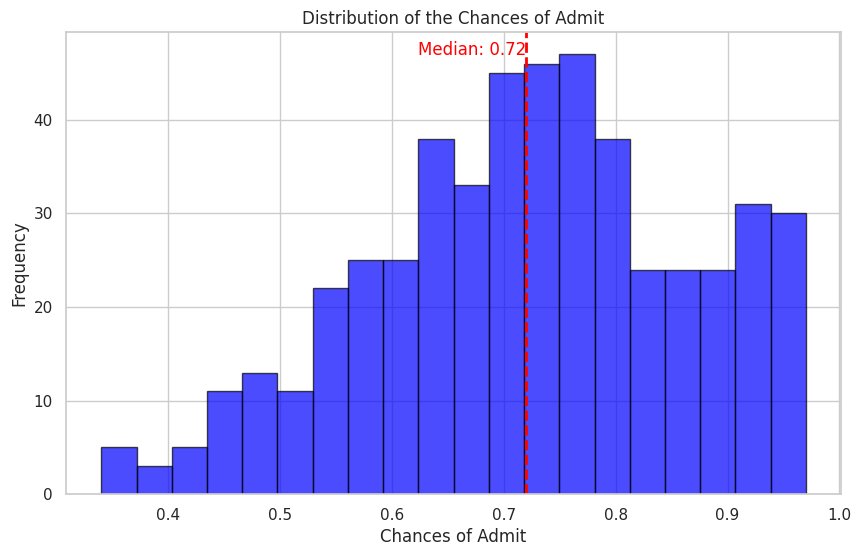

In [66]:
#YOUR CODE HERE

# Plotting the histogram of the Admit column
plt.figure(figsize=(10, 6))
plt.hist(df['Admit'], color='blue', edgecolor='black', alpha=0.7, bins=20)

# Calculating the median of the Admit
median_admit = df['Admit'].median()

# Adding a red vertical dashed line at the median
plt.axvline(median_admit, color='red', linestyle='dashed', linewidth=2)

# Annotating the median value on the plot
plt.text(median_admit, plt.gca().get_ylim()[1]*0.95, f'Median: {median_admit:.2f}', color='red', ha='right')

# Adding labels and title on histogram
plt.title('Distribution of the Chances of Admit')
plt.xlabel('Chances of Admit')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

**5. Chances of admit seem to vary quite a bit. How much of this depends on research experience? Print the average chance of admit against research. (this can be done using a groupby) and interpret the results.**

In [67]:
#YOUR CODE HERE

# Calculating the average chance of admit based on research experience
average_admit_by_research = df.groupby('Research')['Admit'].mean()

# Printing the result
# Printing the heading
print(f"{'Research':<9} | {'Chance of Admit':<15}")
print("-" * 26)  # Separator for clarity

# Iterating over the Series to print each value under its corresponding header
for research_status, avg_admit_chance in average_admit_by_research.items():
    print(f"{research_status:<9} | {avg_admit_chance:<15.3f}")




# Interpretation
print("\nInterpretation:")
print("Applicants with research experience (Research=1) have an average chance of admit higher than those without research experience (Research=0).\n" )
print("This indicates that research experience might be a significant factor considered in the admission process, potentially contributing\npositively towards the likelihood of admission.")

Research  | Chance of Admit
--------------------------
0         | 0.635          
1         | 0.790          

Interpretation:
Applicants with research experience (Research=1) have an average chance of admit higher than those without research experience (Research=0).

This indicates that research experience might be a significant factor considered in the admission process, potentially contributing
positively towards the likelihood of admission.


**6. Does the distribution of chances of admit change with university rating? Plot a histogram of chances of admit for each university rating. Plot 5 histograms - with vertical line at the median for each histogram. Interpret what you learn from the plots.** (optional - plot all histograms with the same range on the X-axis to aid in comparisons)

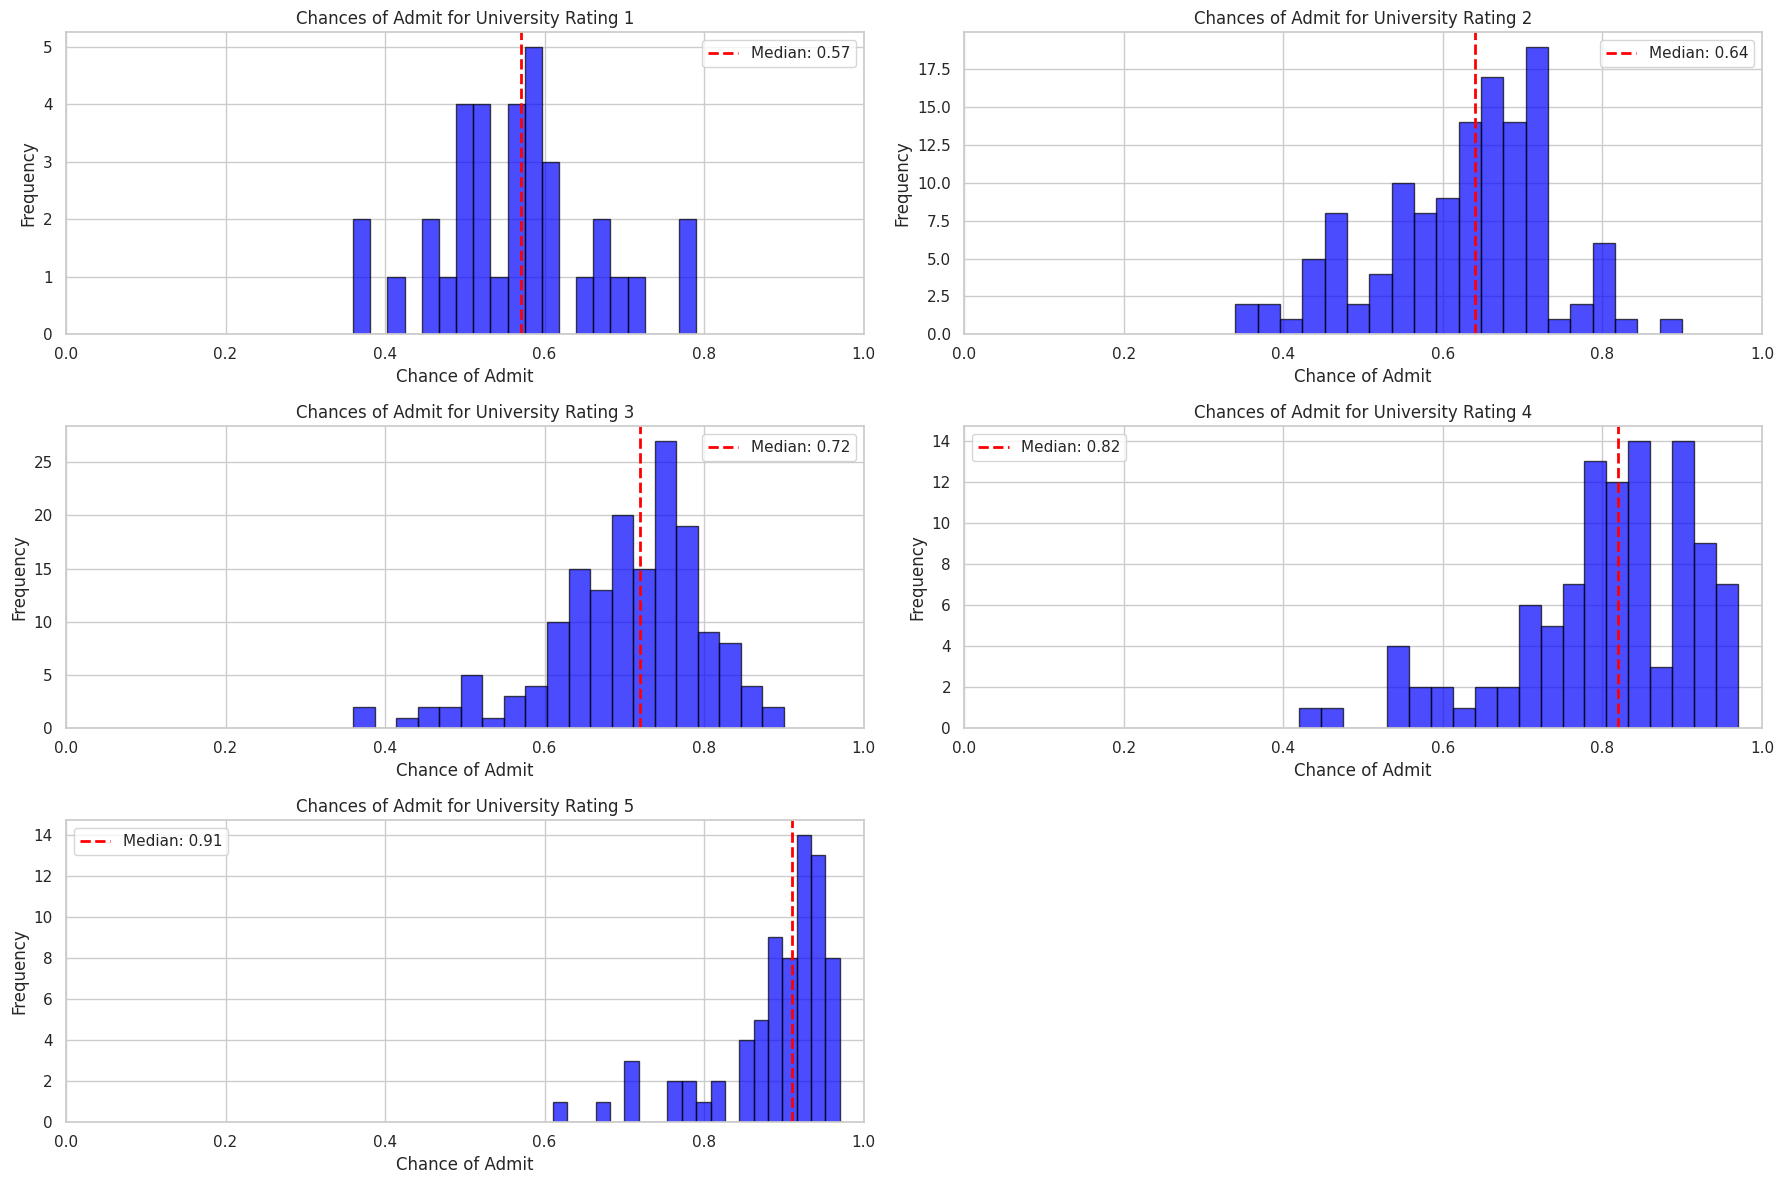


Interpretation:
Impact of University Rating on Admissions: Higher Ratings, Higher Admit Chances
The visual analysis underscores the importance of university rating as a factor in admissions decisions. 
It suggests that, all else being equal, attending a higher-rated undergraduate institution might 
improve one's chances of admission to graduate programs.


In [68]:
#YOUR CODE HERE

# Sorting the Ratings Column in ascending order
ratings = sorted(df['Rating'].unique())

plt.figure(figsize=(18, 12))

for i, rating in enumerate(ratings, 1):
    plt.subplot(3, 2, i)
    data = df[df['Rating'] == rating]['Admit']
    plt.hist(data, bins=20, color='blue', edgecolor='black', alpha=0.7)
    median_value = data.median()

    # Drawing a vertical line for the median value
    plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    plt.legend()

    plt.title(f'Chances of Admit for University Rating {rating}')
    plt.xlabel('Chance of Admit')
    plt.ylabel('Frequency')
    plt.xlim(0, 1)  # Ensuring the same range on the X-axis for all plots

plt.tight_layout()
plt.show()

# Interpretation
print("\nInterpretation:")
print("""Impact of University Rating on Admissions: Higher Ratings, Higher Admit Chances
The visual analysis underscores the importance of university rating as a factor in admissions decisions.
It suggests that, all else being equal, attending a higher-rated undergraduate institution might
improve one's chances of admission to graduate programs.""")


**7. Another way to look at the relationship between two variables is through scatter plots. Plot a scatter plot between TOEFL Score and chance of admit.  Make sure to label the axes. How would you describe this relationship?**

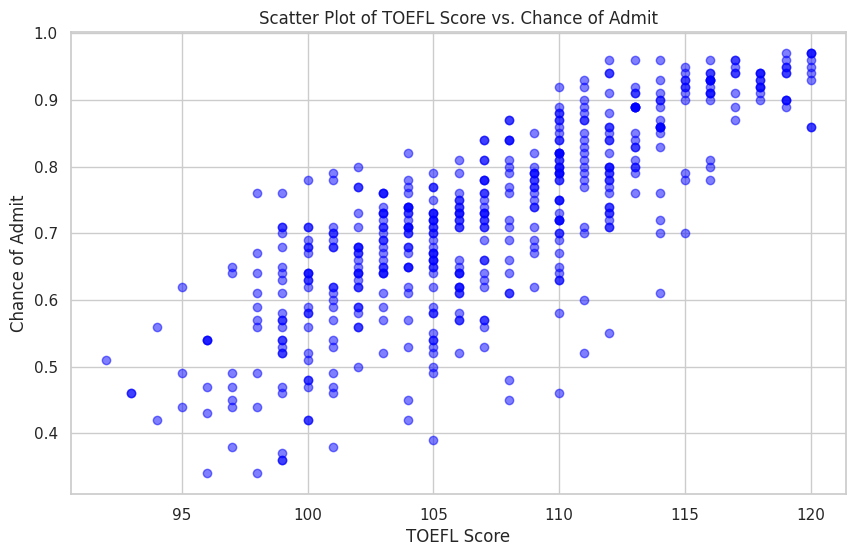


Relationship Description:
A clear upward trend from left to right depicts that with higher TOEFL Scores generally corresponds to higher chances of admit,
it suggests a positive correlation.

This indicates that applicants with higher TOEFL Scores tend to have higher chances of admission.


In [69]:
#YOUR CODE HERE

# Scatter plot between TOEFL Score and chance of admit
plt.figure(figsize=(10, 6))
plt.scatter(df['TOEFL'], df['Admit'], color='blue', alpha=0.5)

# Adding labels and title
plt.title('Scatter Plot of TOEFL Score vs. Chance of Admit')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')

plt.grid(True)
plt.show()

# Relationship Description
print("\nRelationship Description:")
print("""A clear upward trend from left to right depicts that with higher TOEFL Scores generally corresponds to higher chances of admit,
it suggests a positive correlation.
\nThis indicates that applicants with higher TOEFL Scores tend to have higher chances of admission.""")

**8. Boxplots are also useful to look at the relationship between a categorical variable and a numeric variable. Plot a boxplot of chance of admit grouped by "University Rating". (check out the *seaborn* library)**

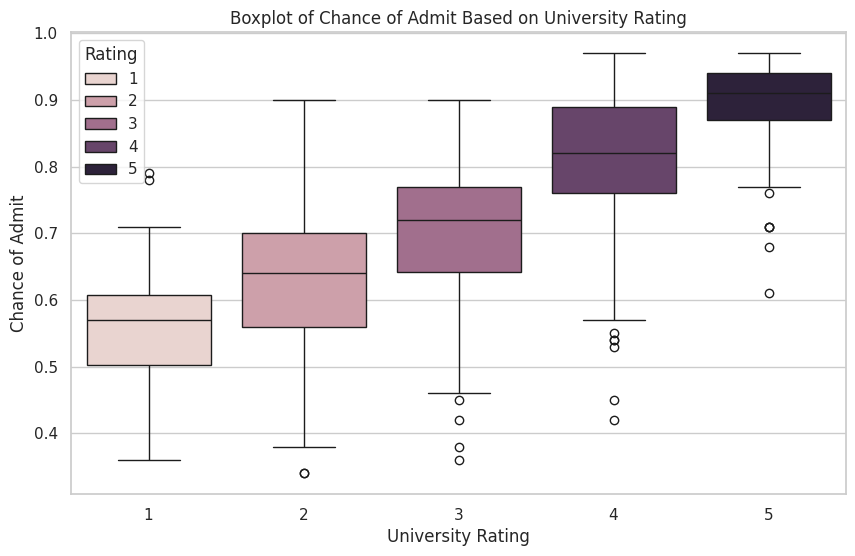

In [70]:
#YOUR CODE HERE

# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Admit', hue='Rating', data=df)

# Add labels and title
plt.title('Boxplot of Chance of Admit Based on University Rating')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')

plt.show()

**8b. The boxplots above show some outliers.  In particular the box for 'University Rating' = 5 has some cases with lower 'Chance of Admit'.  Can you identify which case (by serial number) has the lowest Chance of Admit but comes from a university with Rating = 5?**


In [71]:
#YOUR CODE HERE

# Filter the DataFrame for cases with University Rating = 5
df_rating_5 = df[df['Rating'] == 5]

# Find the case with the lowest Chance of Admit
lowest_admit_case = df_rating_5[df_rating_5['Admit'] == df_rating_5['Admit'].min()]

# Print the serial number of the case with the lowest Chance of Admit
print("Case with the lowest Chance of Admit from a University with Rating = 5:")
print(lowest_admit_case[['ID', 'Admit']])


Case with the lowest Chance of Admit from a University with Rating = 5:
      ID  Admit
110  111   0.61


**9. Drop the column for Serial Number. It is not useful for the following summarization and modelling tasks.**

In [72]:
#YOUR CODE HERE

# Drop the column for Serial Number
df.drop(columns=['ID'], inplace=True)

# Display the first few rows of the DataFrame to verify changes
print(df.head())


   GRE  TOEFL  Rating  SOP  LOR  CGPA  Research  Admit
0  337    118       4  4.5  4.5  9.65         1   0.92
1  324    107       4  4.0  4.5  8.87         1   0.76
2  316    104       3  3.0  3.5  8.00         1   0.72
3  322    110       3  3.5  2.5  8.67         1   0.80
4  314    103       2  2.0  3.0  8.21         0   0.65


**10. Very often it is useful to quantify how strong is the relationship between different variables. For example, measures of correlation, such as Pearson's correlation coefficient, can show whether one numeric variable gives information on another numeric variable. Pandas allows us to compute the Pearson correlation coefficient between all pairs of columns in our dataframe . Display the correlations between all pairs of columns . Round values to three decimal places.**

In [76]:
#YOUR CODE HERE

# Compute the Pearson correlation coefficient between all pairs of columns
correlation_matrix = df.corr()

# Round the correlation values to three decimal places
correlation_matrix = correlation_matrix.round(3)

# Display the correlations between all pairs of columns
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
            GRE  TOEFL  Rating    SOP    LOR   CGPA  Research  Admit
GRE       1.000  0.827   0.635  0.613  0.525  0.826     0.563  0.810
TOEFL     0.827  1.000   0.650  0.644  0.542  0.811     0.467  0.792
Rating    0.635  0.650   1.000  0.728  0.609  0.705     0.427  0.690
SOP       0.613  0.644   0.728  1.000  0.664  0.712     0.408  0.684
LOR       0.525  0.542   0.609  0.664  1.000  0.637     0.373  0.645
CGPA      0.826  0.811   0.705  0.712  0.637  1.000     0.501  0.882
Research  0.563  0.467   0.427  0.408  0.373  0.501     1.000  0.546
Admit     0.810  0.792   0.690  0.684  0.645  0.882     0.546  1.000


**11. Heatmaps are a tool for conveniently visualizing correlation data. Plot these correlations as a seaborn heatmap. Which pairs of variables are most closely correlated? Which variable gives the most information on chance of admit?** (See our `Module1_Data/Visualization` Module for hints)

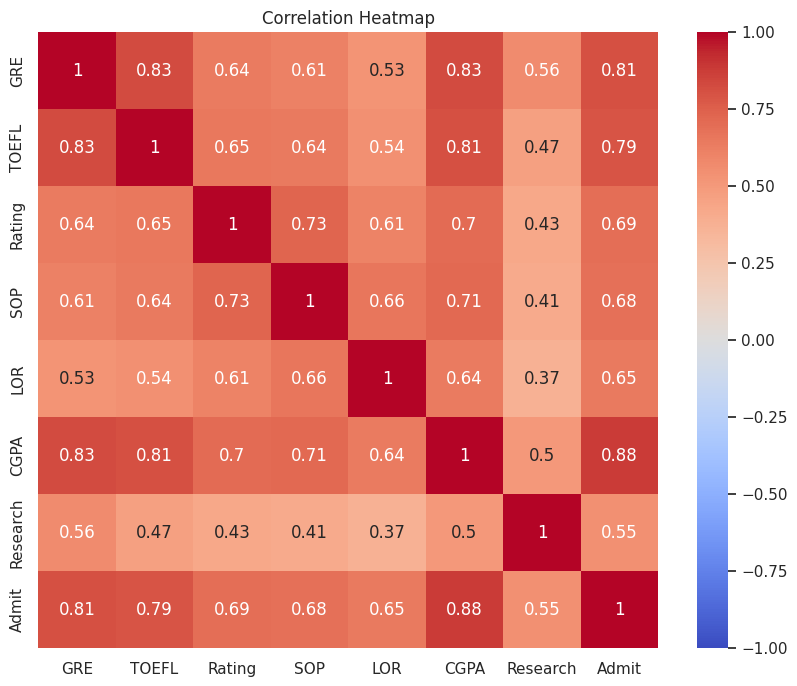

Pairs of variables most closely correlated:
Admit  CGPA     0.882
CGPA   Admit    0.882
TOEFL  GRE      0.827
GRE    TOEFL    0.827
       CGPA     0.826
dtype: float64

Variable that gives the most information on chance of admit: CGPA


In [77]:
#YOUR CODE HERE

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Find the variables most closely correlated
highest_correlation = correlation_matrix.unstack().sort_values(ascending=False)
print("Pairs of variables most closely correlated:")
print(highest_correlation[(highest_correlation != 1) & (highest_correlation.abs() > 0.7)].head(5))

# Find the variable that gives the most information on chance of admit
chance_of_admit_correlation = correlation_matrix['Admit'].drop('Admit')
most_informative_variable = chance_of_admit_correlation.abs().idxmax()
print(f"\nVariable that gives the most information on chance of admit: {most_informative_variable}")

**12. Build a linear model to predict the chance of admit using the application info available. Generate predictions and compare predicted quantity to the actual value in a scatter plot. Print the $R^2$ value - which measures the effectiveness of the linear model, and the RMSE for your predictions (dont forget to round!)**  We will be covering predictive modeling in upcoming lectures, so having tried it first will give you better context for the material.  You can re-use the code in the section "A Taste of Whats to Come: Predictive Modeling" at the end of the `Managing_Data.ipynb` notebook from `Module1_Data`.

R-squared value: 0.819
RMSE: 0.061


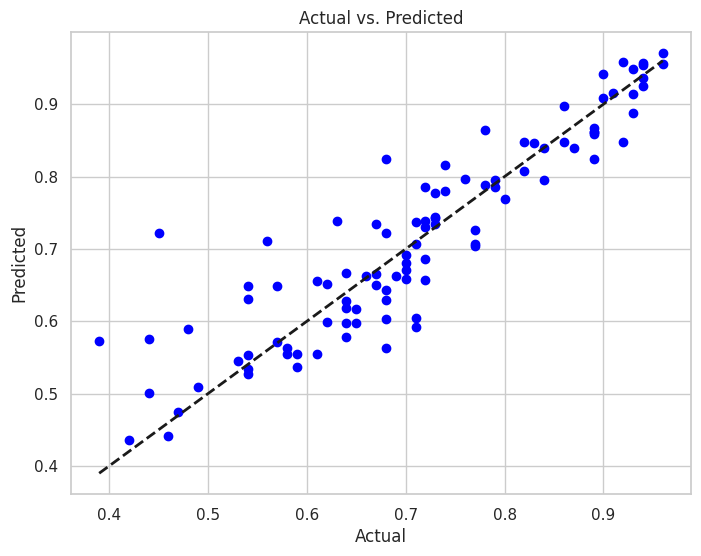

In [78]:
#YOUR CODE HERE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define features (X) and target variable (y)
X = df.drop(columns=['Admit'])
y = df['Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
y_pred = model.predict(X_test)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print R-squared value and RMSE
print("R-squared value:", round(r2, 3))
print("RMSE:", round(rmse, 3))

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


**13. Describe how the admissions team might take action to use the results of this model to aid in the admissions process.  Specifically what actions could they take, and what might the impact be of an effective model.  Do you see any concerns with using this data for this purpose?**

Answer:

Use of the results of this model to aid in the admissions process
- **Identifying At-Risk Applicants**:
  - Pinpoint applicants with lower predicted admission probabilities.
  - Conduct thorough evaluations to discern contributing factors.
  - Offer additional support or guidance as necessary.

- **Resource Allocation**:
  - Allocate resources more effectively based on influencing factors.
  - Prioritize outreach efforts or provide supplementary support to applicants with lower predicted admission probabilities and strong potential.

- **Admissions Criteria Adjustment**:
  - Adjust admissions criteria based on patterns revealed by the model.
  - Ensure criteria reflect attributes conducive to academic success.

- **Enhancing Diversity and Inclusion**:
  - Foster a fair and equitable admissions process for all applicants.
  - Identify and address potential biases within the admissions process.
  - Take proactive measures to promote diversity and inclusion within the student body.

**Impact of an Effective Model**:
- **Improved Admissions Decisions**:
  - Increase likelihood of admitting academically successful students who positively contribute to the university community.
- **Resource Optimization**:
  - Target outreach efforts and support resources more efficiently.
  - Improve overall resource allocation and efficiency.
- **Enhanced Student Experience**:
  - Admit students well-suited to the academic program and campus environment.
  - Contribute to positive student experiences, retention, and graduation rates.

**Potential Concerns**:
- **Fairness and Bias**:
  - Risk of perpetuating or amplifying biases present in historical admissions data.
- **Transparency and Interpretability**:
  - Complex model may hinder understanding for admissions officers and applicants.
- **Privacy and Ethics**:
  - Raises ethical questions regarding privacy, consent, and fairness.
  - Requires careful consideration of data collection, usage, and protection to ensure compliance with legal and ethical standards.



**14.(Optional - Extra Credit) We did the previous exercise without using a train/test split of the data.  This is probably the last time we will do this!  We'll get there.  But if you know how to do this, or want to practice in advance, perform the same LinearRegression with an 80/20 train/test split.  Train the regression, and make predictions on the test data.  Measure and report the RMSE.**

In [80]:
#YOUR CODE HERE
from sklearn.linear_model import LinearRegression

# Define features (X) and target variable (y)
X = df.drop(columns=['Admit'])
y = df['Admit']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions on the test data
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print RMSE
print("RMSE:", round(rmse, 3))


RMSE: 0.061


**15. (Optional - Extra Credit) There are many different types of predictive models, each
with their own plusses and minuses. For this task, repeat your modeling performed in last question, but using a sklearn.ensemble.RandomForestRegressor. How does the scatter plot and RMSE compare with the prior results?**

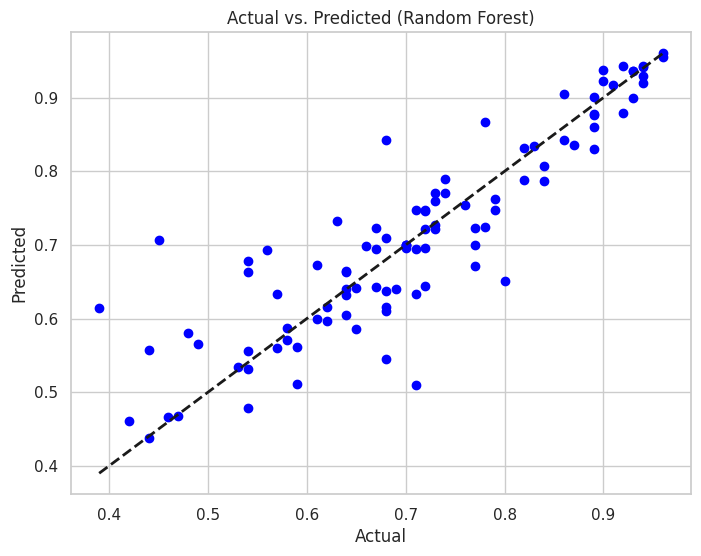

RMSE (Random Forest): 0.066
RandomForestRegressor tends to capture non-linear relationships better than LinearRegression
Comparing the RMSE values:

-For the Linear Regression model, the RMSE was 0.061.
-For the Random Forest Regressor model, the RMSE was 0.66.
      
The RMSE for the Random Forest Regressor model is higher than that of the Linear Regression model. 
This suggests that, in this particular case, the Linear Regression model performed better in terms of prediction accuracy.


In [85]:
from sklearn.ensemble import RandomForestRegressor

#YOUR CODE HERE

# Define features (X) and target variable (y)
X = df.drop(columns=['Admit'])
y = df['Admit']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the random forest regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Generate predictions on the test data
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Random Forest)')
plt.show()

# Print RMSE
print("RMSE (Random Forest):", round(rmse, 3))


print("""RandomForestRegressor tends to capture non-linear relationships better than LinearRegression
Comparing the RMSE values:

-For the Linear Regression model, the RMSE was 0.061.
-For the Random Forest Regressor model, the RMSE was 0.66.

The RMSE for the Random Forest Regressor model is higher than that of the Linear Regression model.
This suggests that, in this particular case, the Linear Regression model performed better in terms of prediction accuracy.""")


##Please submit homework to Brightspace in the form of a file named `lastname_firstname.ipynb`


